In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# The boston dataset

In [3]:
boston = datasets.load_boston()
input_x = boston.data
input_y = boston.target

## Data scription

In [4]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

## Regressor variables

In [5]:
print("Regressor:", boston.feature_names, "\n\nShape:", boston.data.shape)

Regressor: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT'] 

Shape: (506, 13)


In [6]:
data = pd.DataFrame(boston.data, columns=boston.feature_names)
data['PRICE'] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# 神經元設定 : 8個隱藏層，前寬厚窄，2個合成函數
## 第1隱藏層設定0.5的Dropout

In [160]:
n_in = 13
n_h1 = 50
n_h2 = 20
n_h3 = 1
n_h4 = 40
n_h5 = 10
n_h6 = 1
n_h7 = 30
n_h8 = 5
n_out = 1

In [161]:
def add_layer(inputs, in_size, out_size, activation_function=None):
    # add one more layer and return the output of this layer
    with tf.name_scope('layer'):
        with tf.name_scope('weights'):
#             Weights = tf.Variable(tf.random_normal([in_size, out_size]), name='W')
            Weights = tf.Variable(tf.random_normal([in_size, out_size], mean=0., stddev=0.3))
        with tf.name_scope('biases'):
            biases = tf.Variable(tf.zeros([1, out_size]) + 0.1, name='b') # 
#             biases = tf.Variable(tf.zeros([1, out_size]) + 0.03)
        with tf.name_scope('Wx_plus_b'):
            Wx_plus_b = tf.add(tf.matmul(inputs, Weights), biases)
        if activation_function is None:
            outputs = Wx_plus_b
        else:
            outputs = activation_function(Wx_plus_b)
        return outputs

In [162]:
xs = tf.placeholder(tf.float32, [None, n_in])
ys = tf.placeholder(tf.float32, [None, n_out])

In [211]:
h1 = add_layer(xs, n_in, n_h1, activation_function=tf.nn.elu)
h2 = add_layer(tf.nn.dropout(h1, 0.5), n_h1, n_h2, activation_function=tf.nn.relu)
h3 = add_layer(h2, n_h2, n_h3, activation_function=None)
h4 = add_layer(h3, n_h3, n_h4, activation_function=tf.nn.elu)
h5 = add_layer(h4, n_h4, n_h5, activation_function=tf.nn.elu)

h6 = add_layer(h5, n_h5, n_h6, activation_function=None)
h7 = add_layer(h6, n_h6, n_h7, activation_function=tf.nn.elu)
h8 = add_layer(h7, n_h7, n_h8, activation_function=tf.nn.elu)

prediction = add_layer(h8, n_h8, n_out, activation_function=tf.nn.elu)

## Loss funtion : MSE
## Use AdagradOptimizer with learning rate = 0.3

In [260]:
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction), reduction_indices=[1]))
train_step = tf.train.AdagradOptimizer(0.001).minimize(loss)

# Split train & test

In [213]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [229]:
train_x, test_x, train_y, test_y = train_test_split(boston.data, boston.target, test_size=0.2)
train_y, test_y = train_y.reshape([train_y.shape[0], 1]), test_y.reshape([test_y.shape[0], 1])

In [215]:
print(sess.run(loss, feed_dict={xs: train_x, ys: train_y}))
print(sess.run(loss, feed_dict={xs: test_x, ys: test_y}))

600.45
529.035


In [216]:
batch_xs = train_x
batch_ys = train_y

In [261]:
for i in range(60000):
#     training
    sess.run(train_step, feed_dict={xs: batch_xs, ys: batch_ys})
    if i % 1000 == 0:
        # to see the step improvement
        print(sess.run(loss, feed_dict={xs: train_x, ys: train_y}))

FailedPreconditionError: Attempting to use uninitialized value layer_59/biases/b/Adagrad_1
	 [[Node: Adagrad_12/update_layer_59/biases/b/ApplyAdagrad = ApplyAdagrad[T=DT_FLOAT, _class=["loc:@layer_59/biases/b"], use_locking=false, _device="/job:localhost/replica:0/task:0/cpu:0"](layer_59/biases/b, layer_59/biases/b/Adagrad_1, Adagrad_12/learning_rate, gradients_12/layer_59/Wx_plus_b/Add_grad/tuple/control_dependency_1)]]

Caused by op 'Adagrad_12/update_layer_59/biases/b/ApplyAdagrad', defined at:
  File "/Users/chtsou/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/chtsou/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/chtsou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/chtsou/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/chtsou/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/Users/chtsou/anaconda3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/Users/chtsou/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/Users/chtsou/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/chtsou/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/chtsou/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/chtsou/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/chtsou/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/chtsou/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/chtsou/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/chtsou/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Users/chtsou/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/chtsou/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/chtsou/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/chtsou/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/chtsou/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-260-b67f9ca65543>", line 2, in <module>
    train_step = tf.train.AdagradOptimizer(0.001).minimize(loss)
  File "/Users/chtsou/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/optimizer.py", line 298, in minimize
    name=name)
  File "/Users/chtsou/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/optimizer.py", line 422, in apply_gradients
    update_ops.append(processor.update_op(self, grad))
  File "/Users/chtsou/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/optimizer.py", line 61, in update_op
    return optimizer._apply_dense(g, self._v)  # pylint: disable=protected-access
  File "/Users/chtsou/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/adagrad.py", line 79, in _apply_dense
    use_locking=self._use_locking)
  File "/Users/chtsou/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/gen_training_ops.py", line 86, in apply_adagrad
    grad=grad, use_locking=use_locking, name=name)
  File "/Users/chtsou/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 763, in apply_op
    op_def=op_def)
  File "/Users/chtsou/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2395, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/Users/chtsou/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1264, in __init__
    self._traceback = _extract_stack()

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value layer_59/biases/b/Adagrad_1
	 [[Node: Adagrad_12/update_layer_59/biases/b/ApplyAdagrad = ApplyAdagrad[T=DT_FLOAT, _class=["loc:@layer_59/biases/b"], use_locking=false, _device="/job:localhost/replica:0/task:0/cpu:0"](layer_59/biases/b, layer_59/biases/b/Adagrad_1, Adagrad_12/learning_rate, gradients_12/layer_59/Wx_plus_b/Add_grad/tuple/control_dependency_1)]]


In [297]:
print(sess.run(loss, feed_dict={xs: train_x, ys: train_y}))
print(sess.run(loss, feed_dict={xs: test_x, ys: test_y}))

8.72797
6.73947


In [263]:
print(train_y.shape, test_y.shape)

(404, 1) (102, 1)


# Fitting Curve
## x : index
## y : price

## Train data fitting

In [264]:
train_x, test_x, train_y, test_y = train_test_split(boston.data, boston.target, test_size=0.2)
train_y, test_y = train_y.reshape([train_y.shape[0], 1]), test_y.reshape([test_y.shape[0], 1])

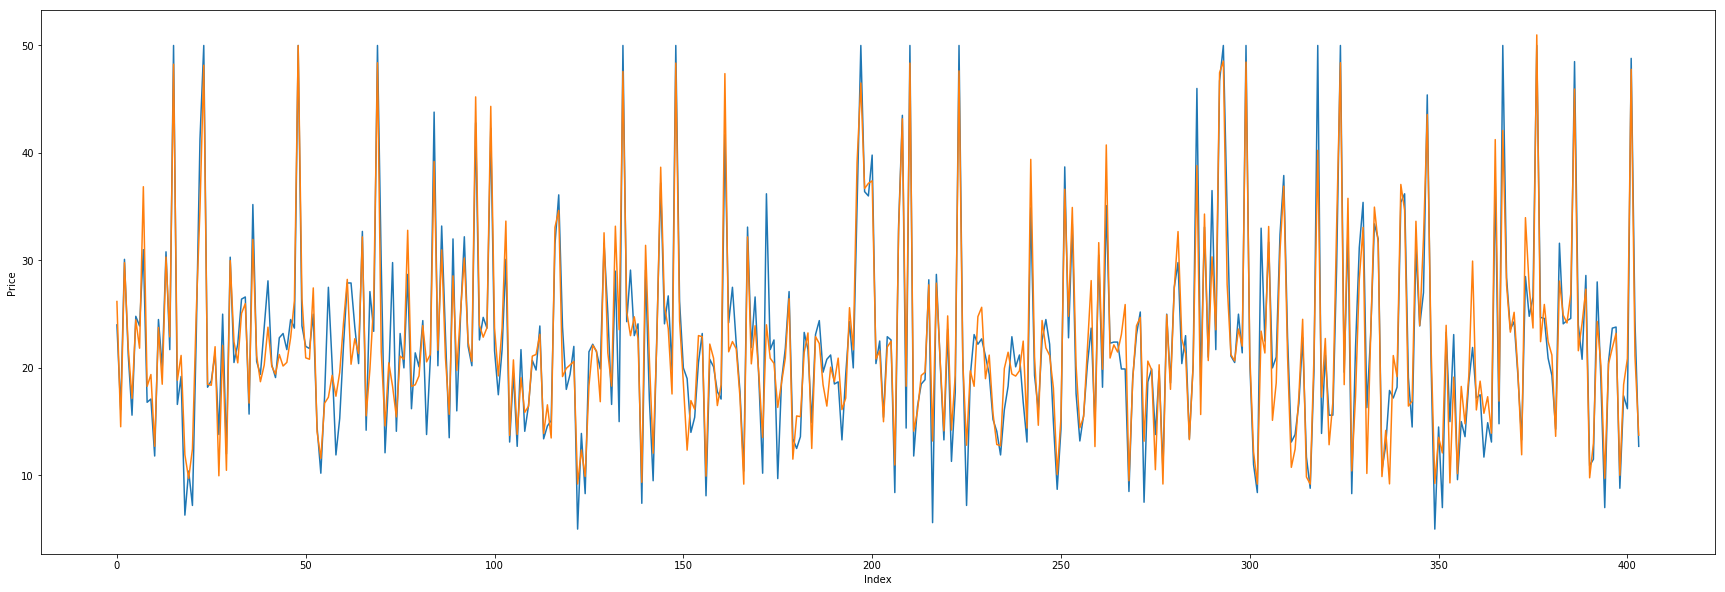

In [291]:
plt.figure(figsize=(30, 10))
ax = plt.subplot()
ax.set_xlabel('Index')
ax.set_ylabel('Price')
plt.plot(range(404), train_y)
plt.plot(range(404), sess.run(prediction, feed_dict={xs:train_x}))
plt.show()

## Test data fitting

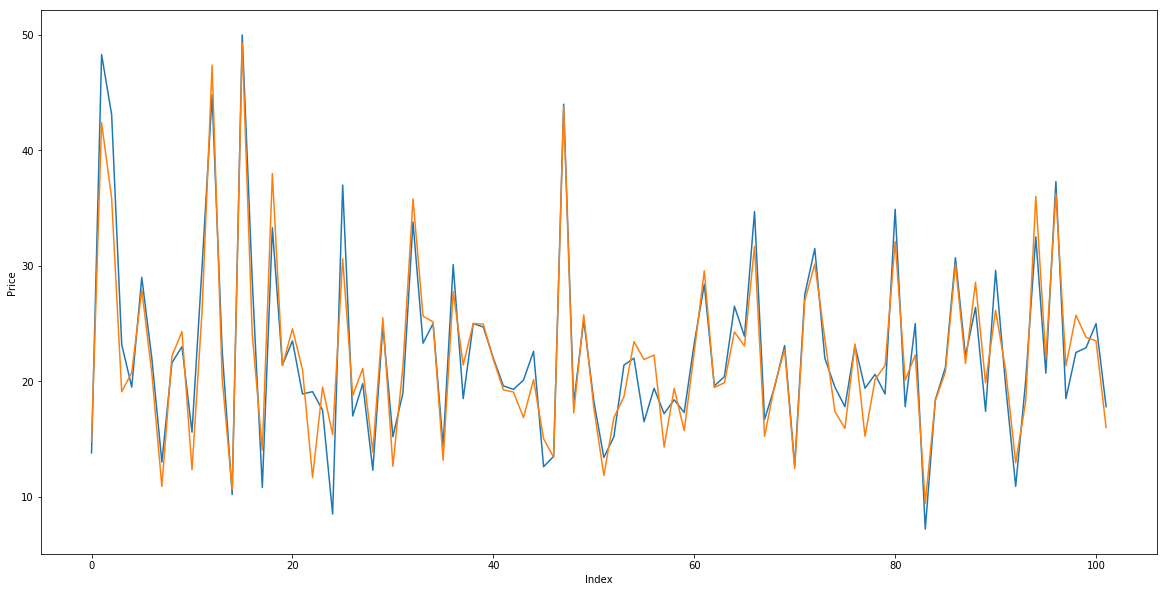

In [305]:
plt.figure(figsize=(20, 10))
ax = plt.subplot()
ax.set_xlabel('Index')
ax.set_ylabel('Price')
plt.plot(range(102), test_y)
plt.plot(range(102), sess.run(prediction, feed_dict={xs:test_x}))
plt.show()

## Test data residual

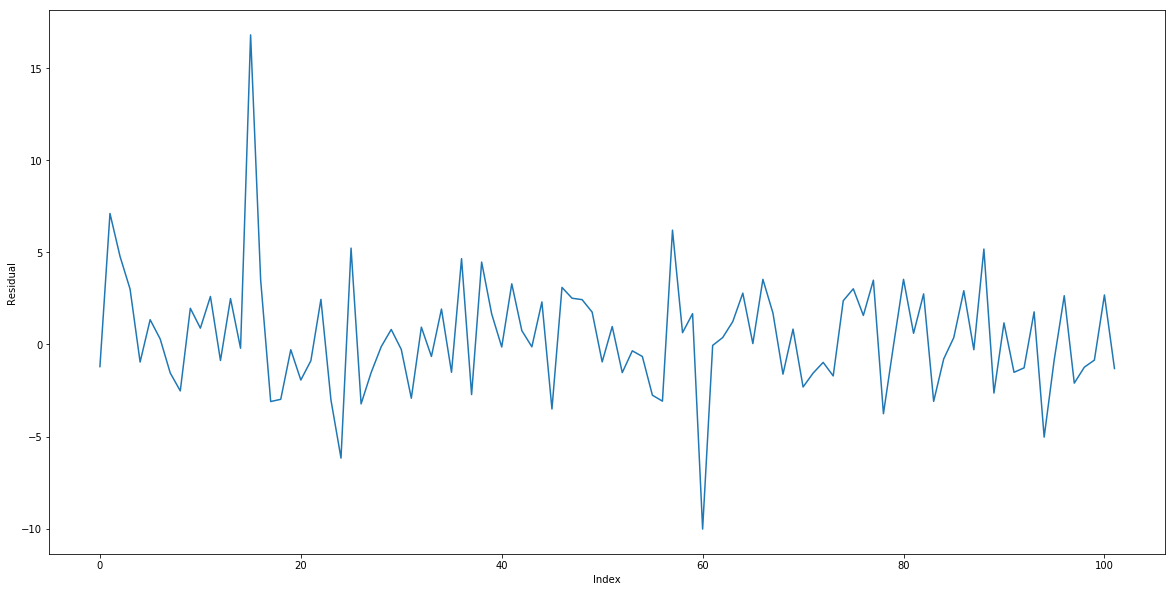

In [296]:
plt.figure(figsize=(20, 10))
ax = plt.subplot()
ax.set_xlabel('Index')
ax.set_ylabel('Residual')

plt.plot(range(102), test_y - sess.run(prediction, feed_dict={xs:test_x}))
plt.show()